In [3]:
# STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Replace with your filename
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# View first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# STEP 3: Basic Info and Data Overview
print("Shape:", df.shape)


Shape: (9994, 21)


In [5]:
print("\nColumn Names:", df.columns)


Column Names: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [8]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


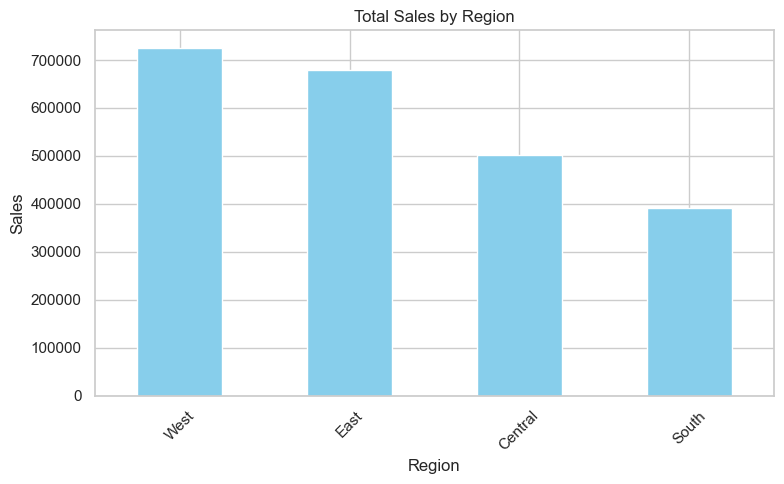

In [10]:
# STEP 4: Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region', figsize=(8,5), color='skyblue')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


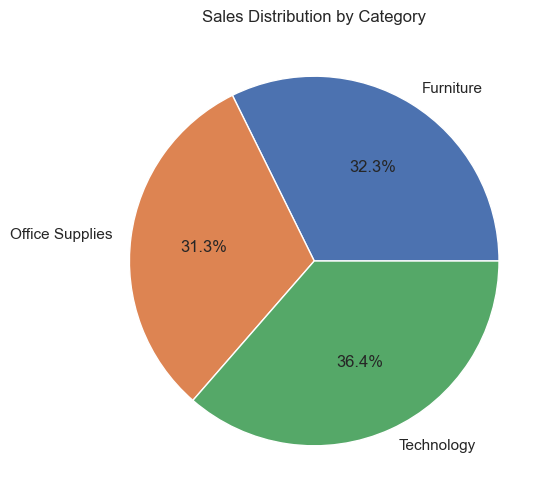

In [11]:
# STEP 5: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Category', figsize=(6,6))
plt.ylabel('')
plt.show()


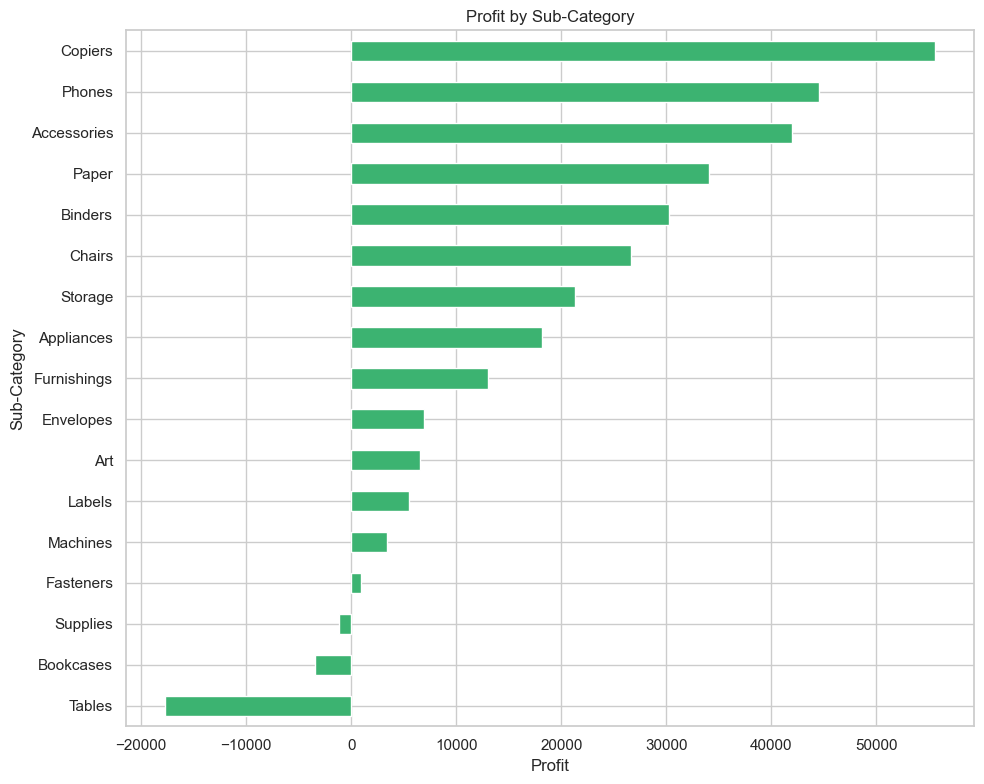

In [12]:
# STEP 6: Profit by Sub-Category
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.plot(kind='barh', title='Profit by Sub-Category', figsize=(10,8), color='mediumseagreen')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()


In [13]:
# STEP 7: Filter High-Value Orders (>1000 sales)
high_value_orders = df[df['Sales'] > 1000]
high_value_orders[['Order ID', 'Sales', 'Category', 'Region']].head()


,Order ID,Sales,Category,Region
10,CA-2014-115812,1706.184,Furniture,West
24,CA-2015-106320,1044.630,Furniture,West
27,US-2015-150630,3083.430,Furniture,East
35,CA-2016-117590,1097.544,Technology,Central
54,CA-2016-105816,1029.950,Technology,East


In [14]:
for col in ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode']:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()}")


Region: 4 unique values → ['South' 'West' 'Central' 'East']
Category: 3 unique values → ['Furniture' 'Office Supplies' 'Technology']
Sub-Category: 17 unique values → ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Segment: 3 unique values → ['Consumer' 'Corporate' 'Home Office']
Ship Mode: 4 unique values → ['Second Class' 'Standard Class' 'First Class' 'Same Day']


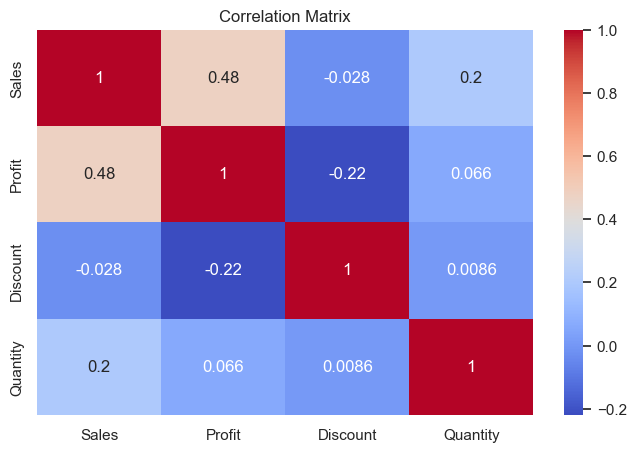

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


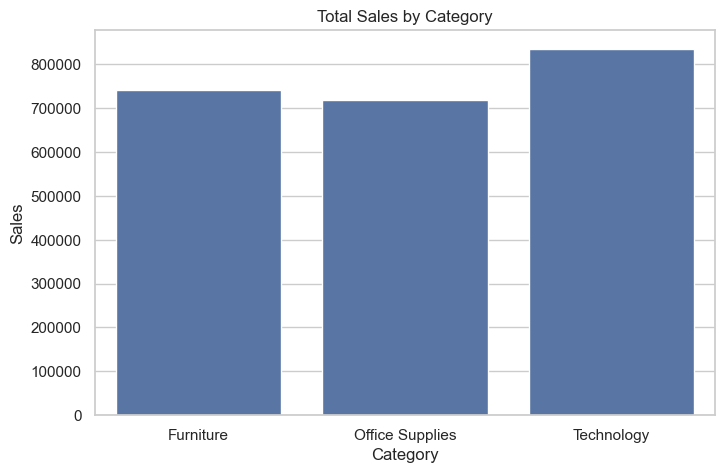

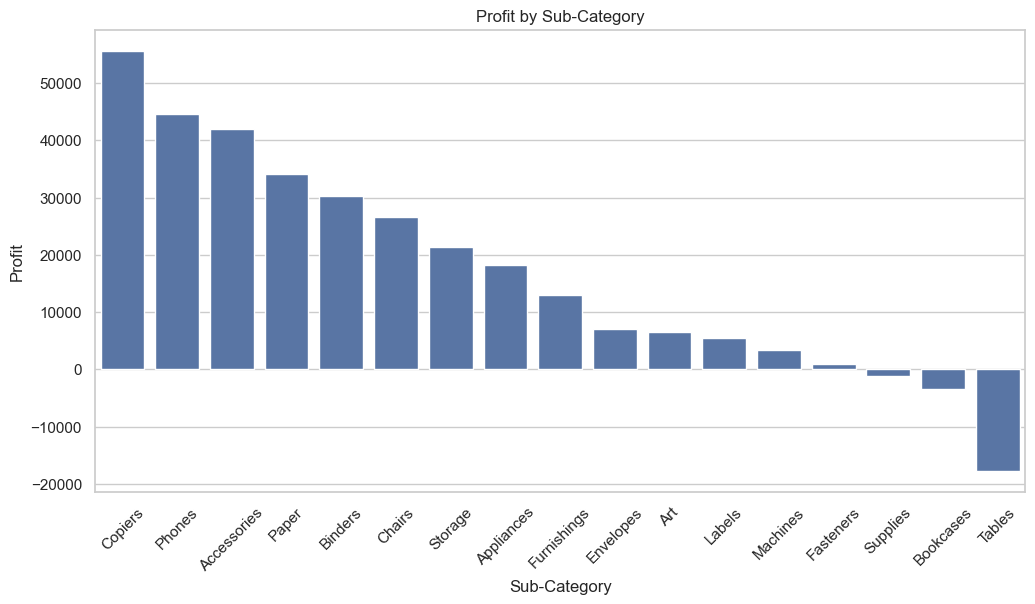

In [16]:
# Bar plot by category
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('Category')[['Sales', 'Profit']].sum().reset_index(), x='Category', y='Sales')
plt.title('Total Sales by Category')
plt.show()

# Profit by sub-category
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('Sub-Category')[['Profit']].sum().sort_values('Profit', ascending=False).reset_index(),
            x='Sub-Category', y='Profit')
plt.title('Profit by Sub-Category')
plt.xticks(rotation=45)
plt.show()


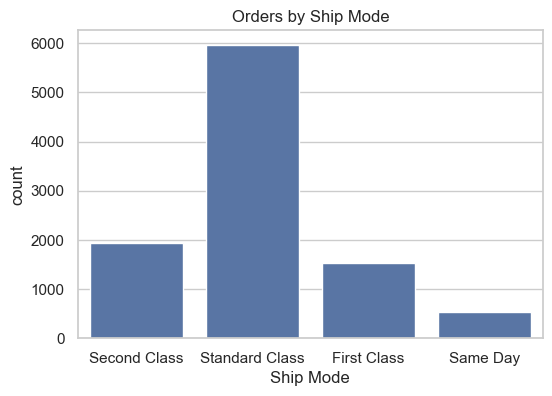

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ship Mode')
plt.title('Orders by Ship Mode')
plt.show()


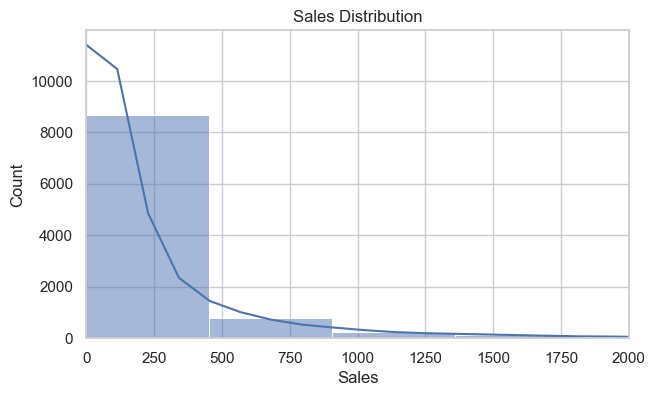

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlim(0, 2000)  # Optional: focus on range
plt.show()


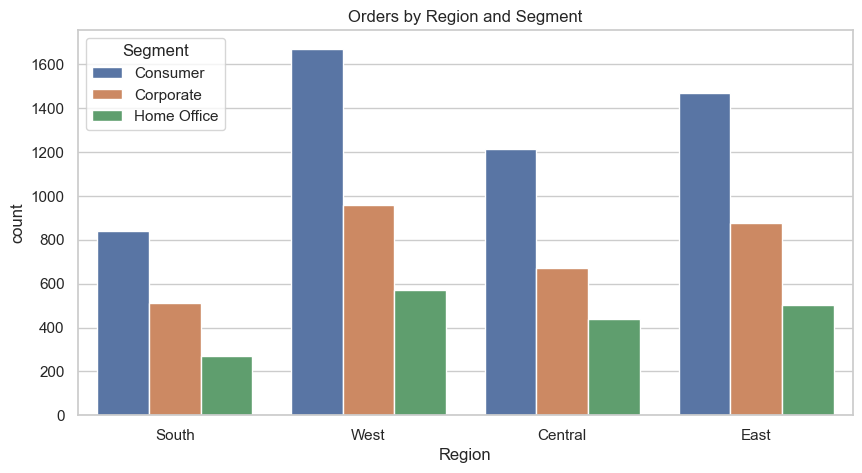

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Region', hue='Segment')
plt.title('Orders by Region and Segment')
plt.show()


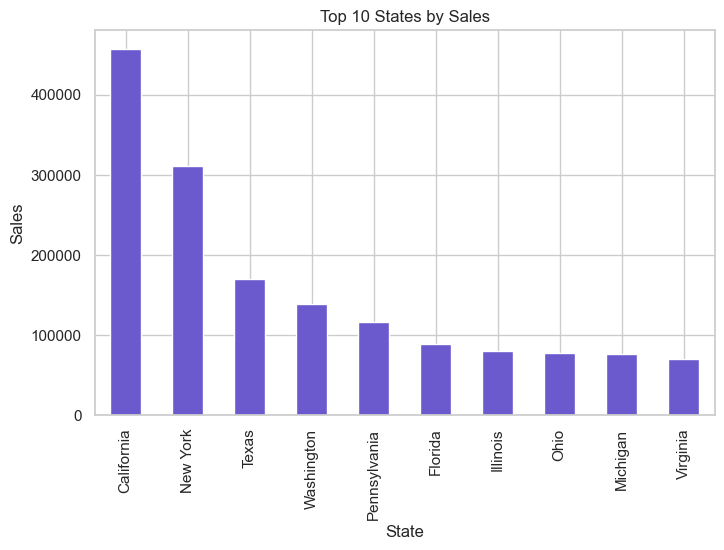

In [20]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', color='slateblue', figsize=(8,5), title='Top 10 States by Sales')
plt.ylabel('Sales')
plt.show()


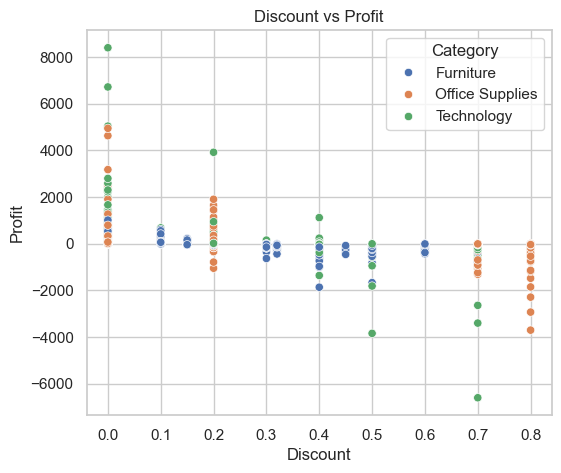

In [21]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()


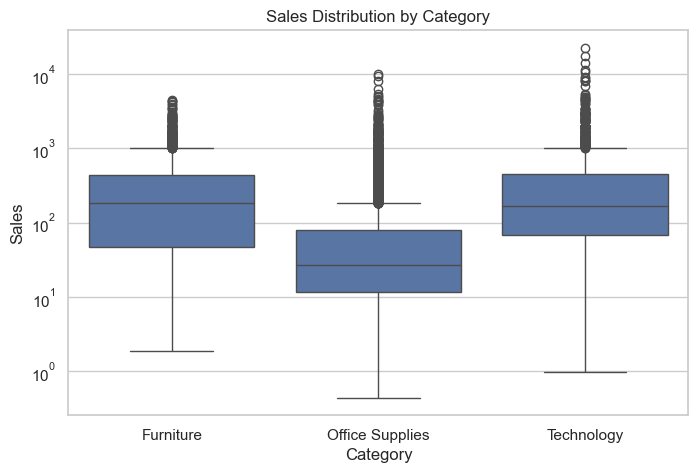

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title('Sales Distribution by Category')
plt.yscale('log')  # Sales have large outliers
plt.show()
